# Noisy Trotter error in observable and expectation

In [ ]:
from qiskit.quantum_info import SparsePauliOp, Statevector, DensityMatrix
from states import ghz_state
import numpy as np

# nnh model
model = 'nnh'
n = 10
# n = 8
gamma = 5e-3
t, r = n, 100
pf_p = 2

H_list = []
if model == 'nnh':
    J, h, pbc = 2, 1, True
    model_par = {'Jz': J, 'hx': h, 'pbc': pbc}
    from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
    nnh = Nearest_Neighbour_1d(n, Jz=J, hx=h, pbc=pbc)
    H_list = [term.to_matrix() for term in nnh.ham_xyz]

dt = t/r

from quantum_simulation_recipe.trotter import pf, expH
import numpy as np

U_dt_appro = pf(H_list, dt, 1)
U_dt_exact = expH(sum(H_list), dt)

ob = SparsePauliOp( 'I'*(n-1) + 'X' , 1 ).to_matrix()
ob_Z = SparsePauliOp( 'I'*(n-1) + 'Z', 1 ).to_matrix()
# state = 
state_0 = np.zeros( (2**n, 2**n), dtype=complex)
state_0[0,0] = 1

# ghz_state = np.zeros( (2**n, 2**n), dtype=complex)
# ghz_state[0,0] = 1
# ghz_state[-1,-1] = 1
ghz_state_input = DensityMatrix(ghz_state(n)).to_operator().to_matrix()

# plus_state = Statevector.from_label('+'*n).data
plus_state = DensityMatrix(Statevector.from_label('+'*n)).to_operator().to_matrix()

from evolution import Evolve_ob, Evolve_state

# ob_data = Evolve_ob(U_dt, U_dt_exact, r, ob, True, gamma)
# ob_Z_data = Evolve_ob(U_dt, U_dt_exact, r, ob_Z, True, gamma)
# state_data = Evolve_state(U_dt, U_dt_exact, r, state_0, True, gamma)
# ghz_data = Evolve_state(U_dt, U_dt_exact, r, ghz_state_input, True, gamma)
ob_data = Evolve_ob(U_dt_appro, U_dt_exact, r, ob, gamma)
ob_Z_data = Evolve_ob(U_dt_appro, U_dt_exact, r, ob_Z, gamma)
# state_data = Evolve_state(U_dt, U_dt_exact, r, state_0, gamma)
state_data = Evolve_state(U_dt_appro, U_dt_exact, r, state_0, gamma, pf_p, t)
# ghz_data = Evolve_state(U_dt, U_dt_exact, r, ghz_state_input, gamma)
ghz_data = Evolve_state(U_dt_appro, U_dt_exact, r, ghz_state_input, gamma, pf_p, t)


100%|██████████| 100/100 [17:03<00:00, 10.24s/it]


[==================================================] 99%

In [ ]:
ob_ZZZ = SparsePauliOp( 'I'*(n-3) + 'ZZZ', 1 ).to_matrix()
ob_ZZZ_data = Evolve_ob(U_dt_appro, U_dt_exact, r, ob_ZZZ, gamma)

## State error curve comparison

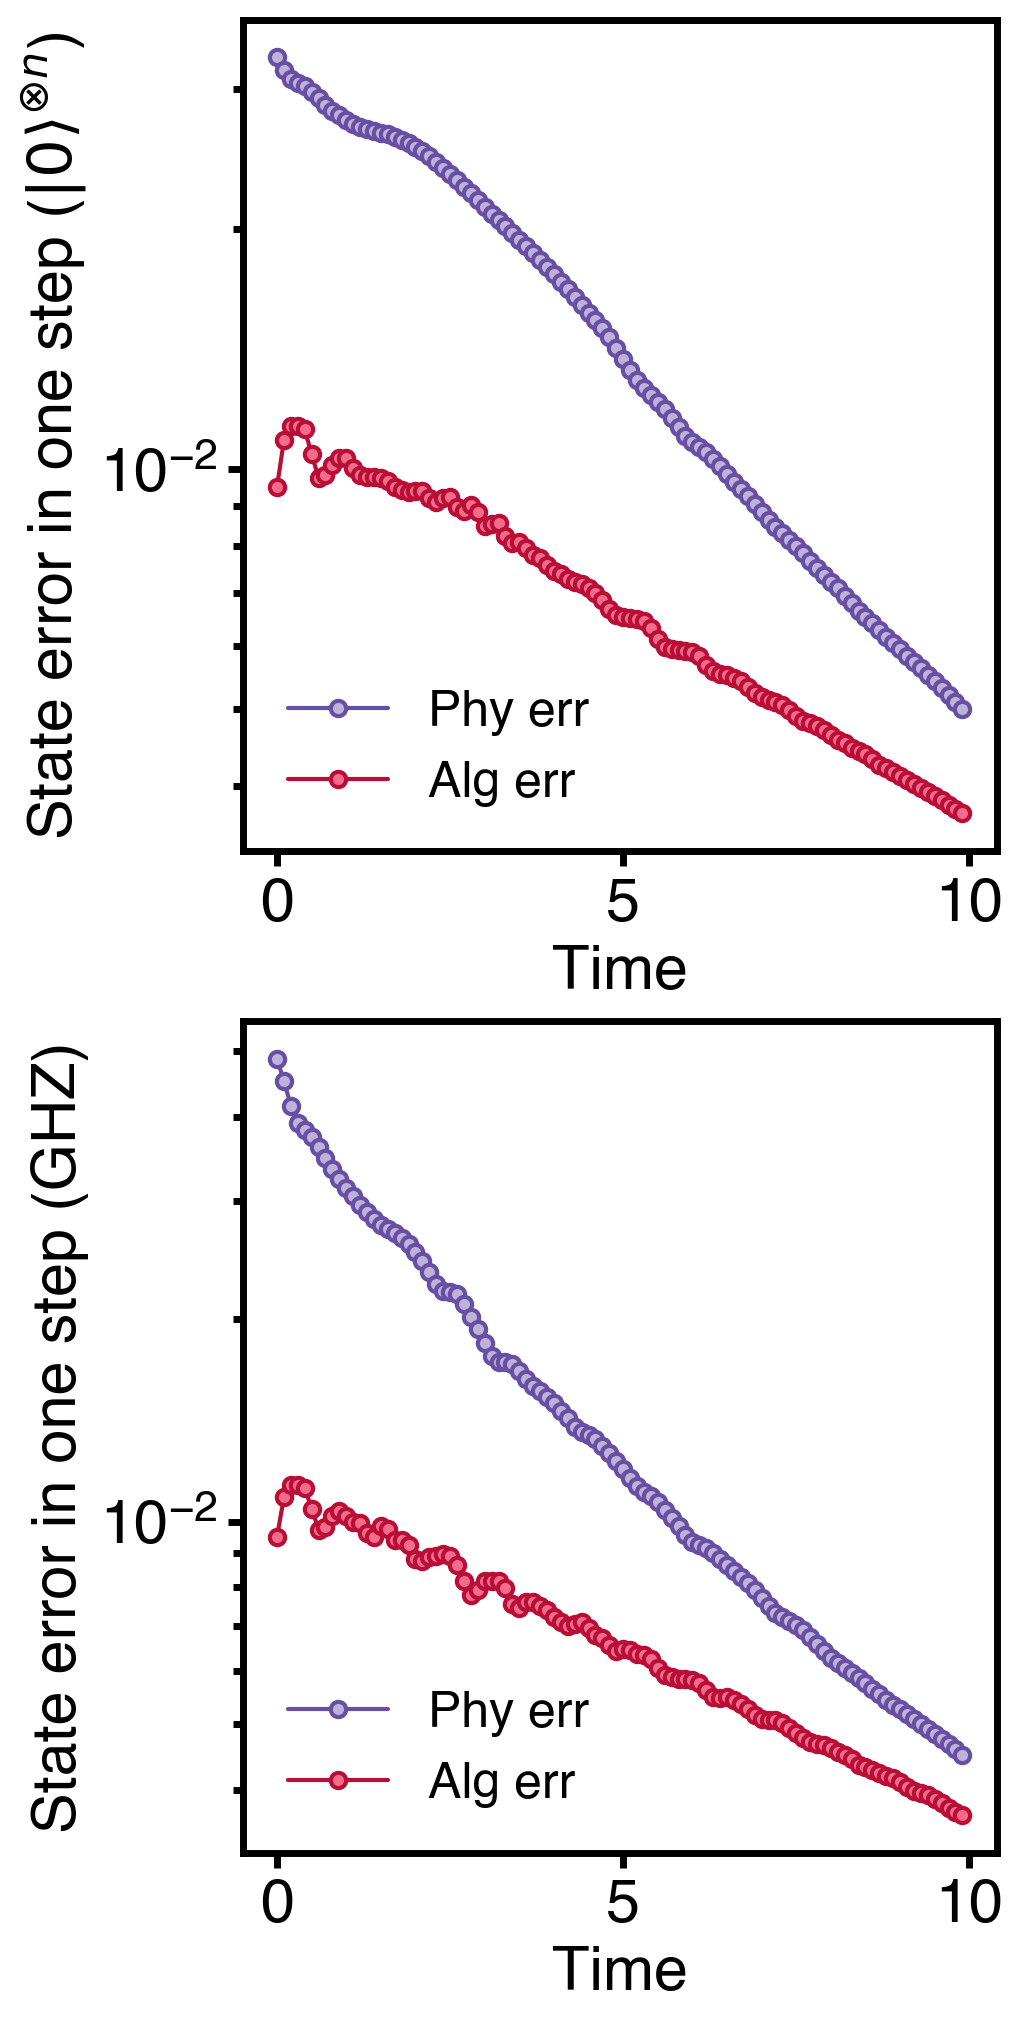

In [10]:
import matplotlib.pyplot as plt
from quantum_simulation_recipe.plot_config import *

good_color_cycle = ['#9467bdFF', '#2ca02cFF', '#d62728FF', '#1f77b4FF', '#ff7f0eFF', '#8c564bFF', '#e377c2FF', '#7f7f7fFF', '#bcbd22FF', '#17becfFF']
set_fontsize(medium=MEDIUM_SIZE+6, large=MEDIUM_SIZE+4, linewidth=2.5)
plt.rc('legend', fontsize=MEDIUM_SIZE) 

mpl.rcParams['savefig.transparent'] = True
mpl.rcParams['axes.grid'] = False
mpl.rcParams['legend.frameon'] = False

# mpl.rcParams['font.family'] = 'sans-serif' 

fig, ax = plt.subplot_mosaic(
    '''
    B
    C
    ''', constrained_layout=True, figsize=(5, 10)
)

gc = GradColors(10)

cm_alg, cm_phy = gc.red, gc.purple
dark_w = 7

# fig, ax = plt.subplot_mosaic(
#     '''
#     AB
#     AC
#     ''', constrained_layout=True, figsize=(12, 8)
# )

# plot_evo(ax['A'], np.arange(r), ob_data.alg_err_list, '.-', c=good_color_cycle[0], label=r'alg_err $X_1$')
# plot_evo(ax['A'], np.arange(r), ob_data.phy_err_list, '.-', c=good_color_cycle[1], label=r'phy_err $X_1$')
# ax_set_text(ax['A'], 'Time', 'Error (ob)', '', legend='lower left', log='y')

t_list = np.arange(r)*dt

plot_evo(ax['B'], t_list, state_data.phy_err_list, '.-', c=cm_phy(dark_w), label=r'Phy err')
plot_evo(ax['B'], t_list, state_data.alg_err_list, '.-', c=cm_alg(dark_w), label=r'Alg err')
ax_set_text(ax['B'], 'Time', r'State error in one step ($|0\rangle^{\otimes n}$)', '', legend='lower left', log='y')

plot_evo(ax['C'], t_list, ghz_data.phy_err_list, '.-', c=cm_phy(dark_w), label=r'Phy err')
plot_evo(ax['C'], t_list, ghz_data.alg_err_list, '.-', c=cm_alg(dark_w), label=r'Alg err')
ax_set_text(ax['C'], 'Time', 'State error in one step (GHZ)', '', legend='lower left', log='y')

fig.savefig(f'./figs/state_decay_n={n}.pdf')


## Misc obs

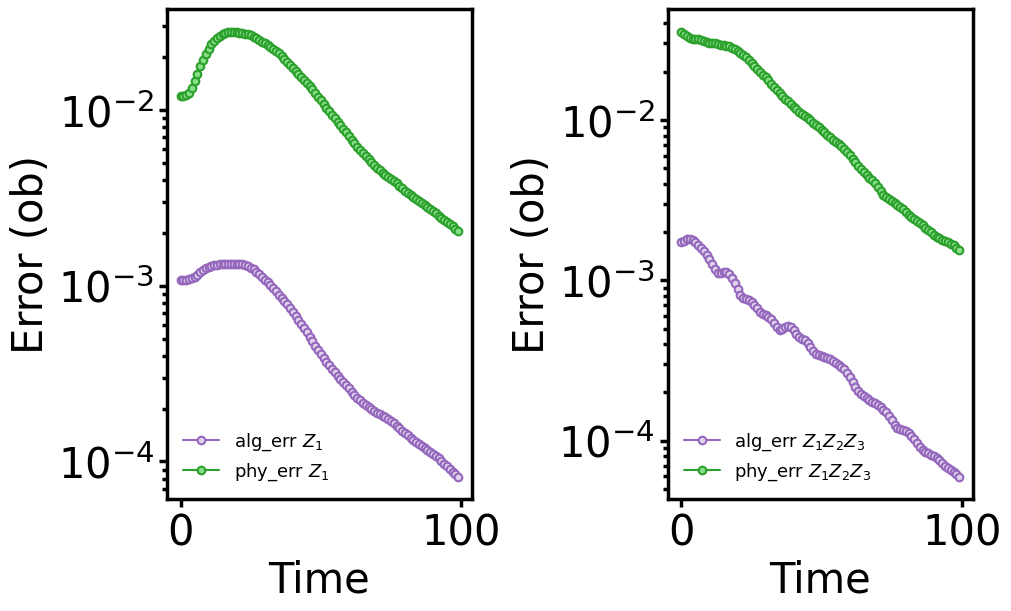

In [5]:
fig2, ax2 = plt.subplot_mosaic(
    '''
    AB
    ''', constrained_layout=True, figsize=(10, 6)
)

plot_evo(ax2['A'], np.arange(r), ob_Z_data.alg_err_list, '.-', c=good_color_cycle[0], label=r'alg_err $Z_1$')
plot_evo(ax2['A'], np.arange(r), ob_Z_data.phy_err_list, '.-', c=good_color_cycle[1], label=r'phy_err $Z_1$')
ax_set_text(ax2['A'], 'Time', 'Error (ob)', '', legend='lower left', log='y')

plot_evo(ax2['B'], np.arange(r), ob_ZZZ_data.alg_err_list, '.-', c=good_color_cycle[0], label=r'alg_err $Z_1Z_2Z_3$')
plot_evo(ax2['B'], np.arange(r), ob_ZZZ_data.phy_err_list, '.-', c=good_color_cycle[1], label=r'phy_err $Z_1Z_2Z_3$')
ax_set_text(ax2['B'], 'Time', 'Error (ob)', '', legend='lower left', log='y')


## Common observables

In [11]:
# common observables
from evolution import Evolve_ob, Evolve_state
import numpy as np

model = 'nnh'
n = 10 
# n = 8
p = 5e-3
t, r = n, 100

H_list = []
if model == 'nnh':
    J, h, pbc = 2, 1, True
    model_par = {'Jz': J, 'hx': h, 'pbc': pbc}
    from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
    nnh = Nearest_Neighbour_1d(n, Jz=J, hx=h, pbc=pbc)
    H_list = [term.to_matrix() for term in nnh.ham_xyz]

dt = t/r

state_0 = np.zeros( (2**n, 2**n), dtype=complex)
state_0[0,0] = 1

from quantum_simulation_recipe.trotter import pf, expH

U_dt = pf(H_list, dt, 1)
U_dt_exact = expH( sum(H_list), dt )

avg_cor = np.zeros((2**n, 2**n), dtype=complex)
avg_mag = np.zeros((2**n, 2**n), dtype=complex)
l_echo = state_0

from qiskit.quantum_info import SparsePauliOp, Statevector, DensityMatrix

str_ord_par = SparsePauliOp( 'X' + 'Z'*(n-2) + 'X', 1 ).to_matrix()

for i in range(n-1):
    Z_i = SparsePauliOp( 'I'*i + 'Z' + 'I'*(n-i-1), 1 ).to_matrix()
    Z_j = SparsePauliOp( 'I'*(i+1) + 'Z' + 'I'*(n-i-2), 1 ).to_matrix()
    avg_cor += Z_i @ Z_j
    avg_mag += Z_i
avg_cor += SparsePauliOp( 'Z' + 'I'*(n-2) + 'Z', 1 ).to_matrix()
avg_mag += SparsePauliOp( 'I'*(n-1) + 'Z', 1 ).to_matrix()
avg_cor /= n
avg_mag /= n

avg_cor_data = Evolve_ob(U_dt, U_dt_exact, r, avg_cor, p)
avg_mag_data = Evolve_ob(U_dt, U_dt_exact, r, avg_mag, p)
l_echo_data = Evolve_ob(U_dt, U_dt_exact, r, l_echo, p)
str_ord_par_data = Evolve_ob(U_dt, U_dt_exact, r, str_ord_par, p)

100%|██████████| 100/100 [16:26<00:00,  9.86s/it]


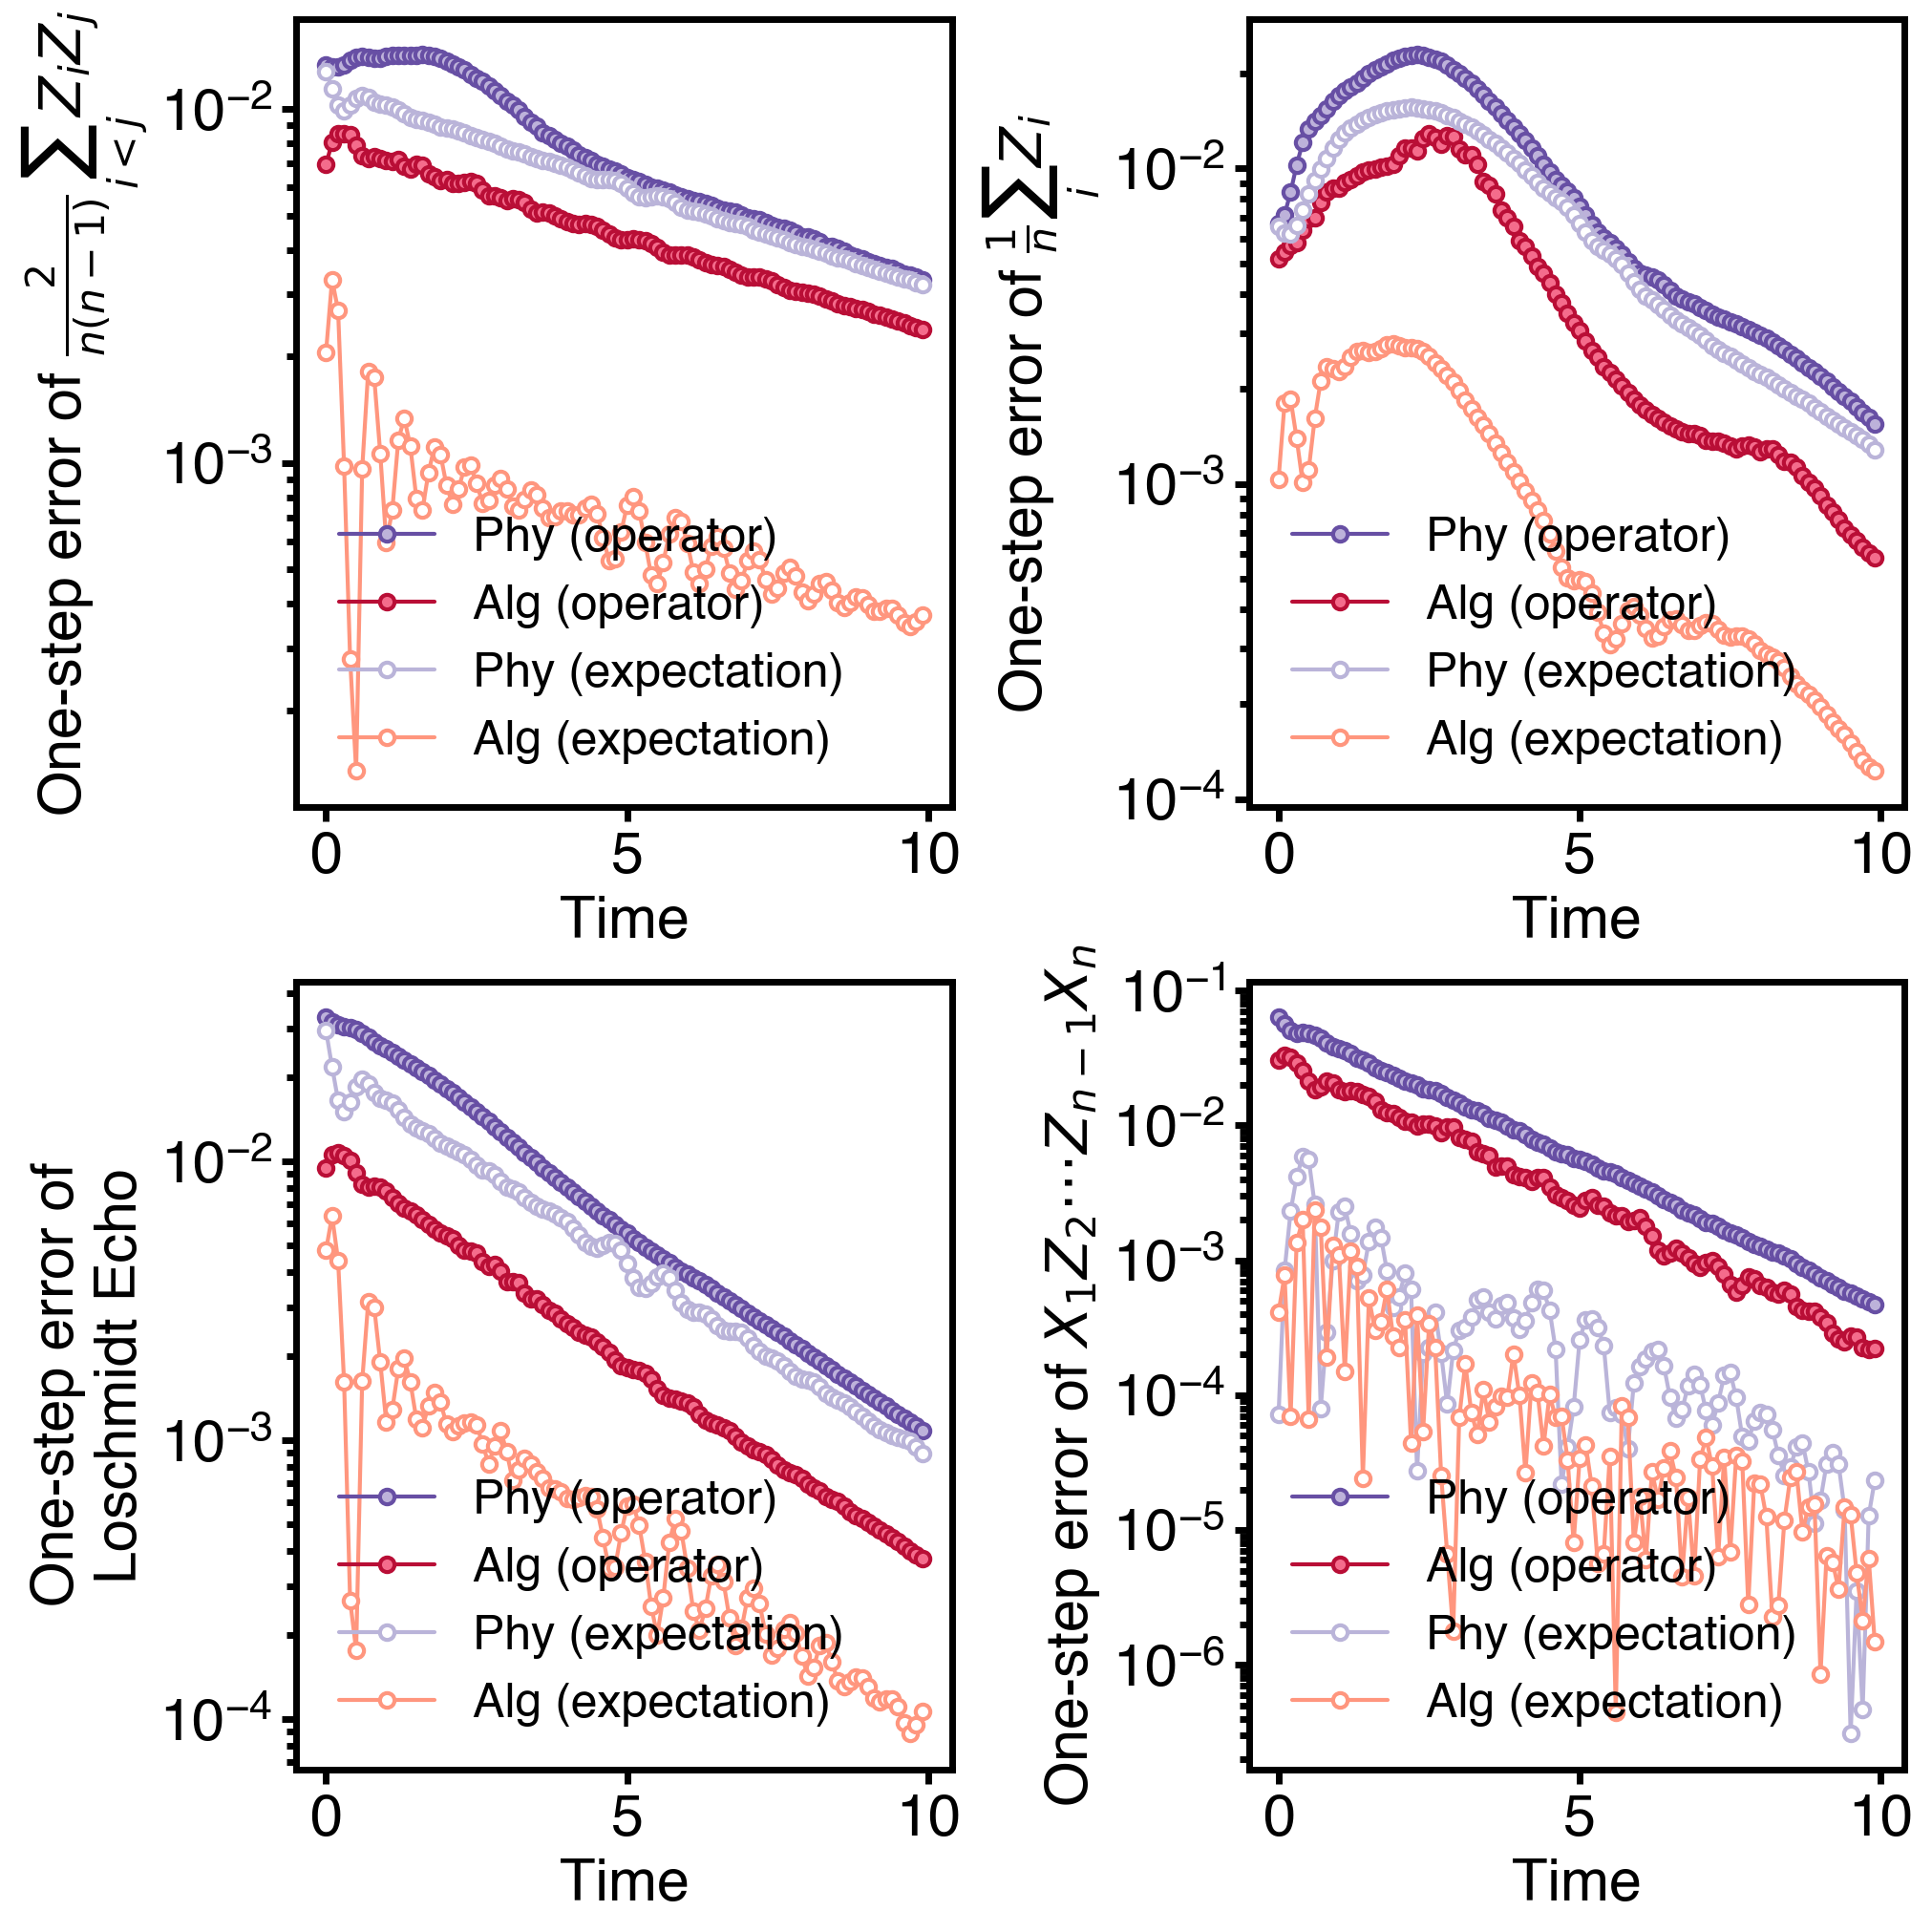

In [12]:
import matplotlib.pyplot as plt
from quantum_simulation_recipe.plot_config import *

good_color_cycle = ['#9467bdFF', '#2ca02cFF', '#d62728FF', '#1f77b4FF', '#ff7f0eFF', '#8c564bFF', '#e377c2FF', '#7f7f7fFF', '#bcbd22FF', '#17becfFF']
set_fontsize(medium=MEDIUM_SIZE+6, large=MEDIUM_SIZE+4, linewidth=2.5)
plt.rc('legend', fontsize=MEDIUM_SIZE) 

mpl.rcParams['savefig.transparent'] = True
mpl.rcParams['axes.grid'] = False
mpl.rcParams['legend.frameon'] = False

# mpl.rcParams['font.family'] = 'sans-serif' 

gc = GradColors(10)
cm_phy, cm_alg = gc.purple, gc.red 
# cm_phy, cm_alg = gc.red, gc.purple

t_list = np.arange(r)*dt

fig3, ax3 = plt.subplot_mosaic(
    '''
    AB
    CD
    ''', constrained_layout=True, figsize=(10, 10)
)
dark_w, light_w = 7, 3

expval_color = good_color_cycle[-3]

plot_evo(ax3['A'], t_list, avg_cor_data.phy_err_list, '.-', c=cm_phy((dark_w)), label=r'Phy (operator)')
plot_evo(ax3['A'], t_list, avg_cor_data.alg_err_list, '.-', c=cm_alg(dark_w), label=r'Alg (operator)')
# plot_evo(ax3['A'], t_list, avg_cor_data.alg_err_list, '.-', c=good_color_cycle[0], label=r'alg_err')
# plot_evo(ax3['A'], t_list, avg_cor_data.phy_err_list, '.-', c=good_color_cycle[1], label=r'phy_err')
plot_evo(ax3['A'], t_list, avg_cor_data.state_phy_err_list, '.-', c=cm_phy((light_w)), label=r'Phy (expectation)')
plot_evo(ax3['A'], t_list, avg_cor_data.state_alg_err_list, '.-', c=cm_alg((light_w)), label=r'Alg (expectation)')

ax_set_text(ax3['A'], 'Time', r'One-step error of $\frac{2}{n(n-1)}\sum_{i<j}Z_iZ_j$', '', legend='lower left', log='y')

plot_evo(ax3['B'], t_list, avg_mag_data.phy_err_list, '.-', c=cm_phy(dark_w), label=r'Phy (operator)')
plot_evo(ax3['B'], t_list, avg_mag_data.alg_err_list, '.-', c=cm_alg(dark_w), label=r'Alg (operator)')
plot_evo(ax3['B'], t_list, avg_mag_data.state_phy_err_list, '.-', c=cm_phy((light_w)), label=r'Phy (expectation)')
plot_evo(ax3['B'], t_list, avg_mag_data.state_alg_err_list, '.-', c=cm_alg((light_w)), label=r'Alg (expectation)')
ax_set_text(ax3['B'], 'Time', r'One-step error of $\frac{1}{n}\sum_{i}Z_i$', '', legend='lower left', log='y')

plot_evo(ax3['C'], t_list, l_echo_data.phy_err_list, '.-', c=cm_phy(dark_w), label=r'Phy (operator)')
plot_evo(ax3['C'], t_list, l_echo_data.alg_err_list, '.-', c=cm_alg(dark_w), label=r'Alg (operator)')
plot_evo(ax3['C'], t_list, l_echo_data.state_phy_err_list, '.-', c=cm_phy((light_w)), label=r'Phy (expectation)')
plot_evo(ax3['C'], t_list, l_echo_data.state_alg_err_list, '.-', c=cm_alg((light_w)), label=r'Alg (expectation)')
ax_set_text(ax3['C'], 'Time', 'One-step error of \nLoschmidt Echo', '', legend='lower left', log='y')

plot_evo(ax3['D'], t_list, str_ord_par_data.phy_err_list, '.-', c=cm_phy(dark_w), label=r'Phy (operator)')
plot_evo(ax3['D'], t_list, str_ord_par_data.alg_err_list, '.-', c=cm_alg(dark_w), label=r'Alg (operator)')
plot_evo(ax3['D'], t_list, str_ord_par_data.state_phy_err_list, '.-', c=cm_phy((light_w)), label=r'Phy (expectation)')
plot_evo(ax3['D'], t_list, str_ord_par_data.state_alg_err_list, '.-', c=cm_alg((light_w)), label=r'Alg (expectation)')
ax_set_text(ax3['D'], 'Time', r'One-step error of $X_1Z_2\cdots Z_{n-1}X_n$', '', legend='lower left', log='y')

fig3.savefig(f'./figs/common_obs_state_n={n}.pdf')